In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


no data directory set up for clouds defaulting to /data
updated file list


In [55]:
snms = kid_readout.analysis.archive.load_noise_pkl('/artemis/readout/pkl/2016-02-29_150515_cw_noise_test.pkl')

In [56]:
snms[0].resonator_model.f_0

1038.0636773549161

In [49]:
len(snms)

32

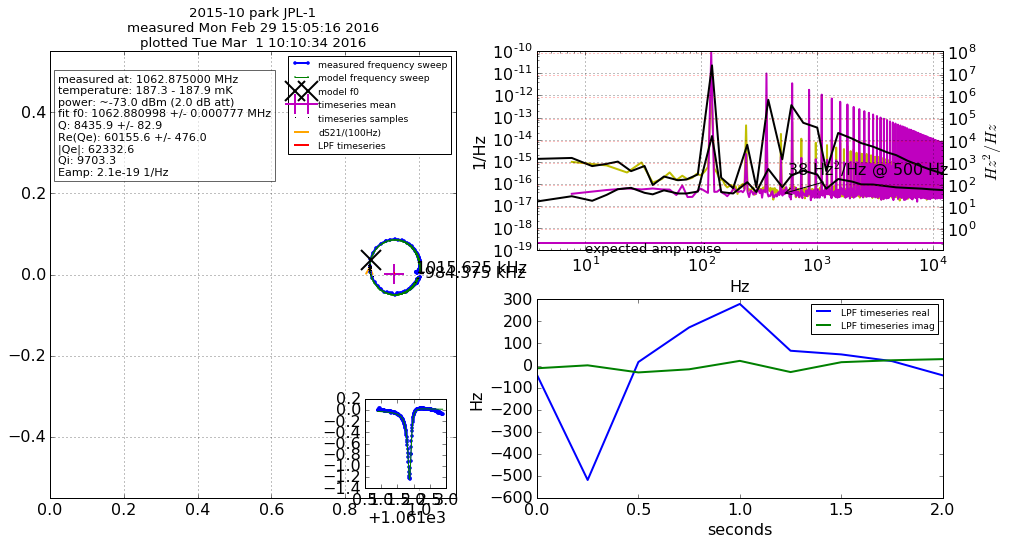

In [57]:
blah = snms[16+3].plot()

In [145]:
snm = snms[3+15]

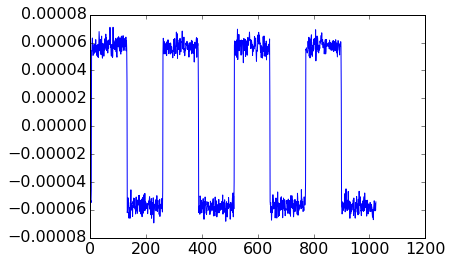

In [153]:
plot(snm.fractional_fluctuation_timeseries.imag[:1024])

In [148]:
fold = snm.fractional_fluctuation_timeseries.reshape((-1,256)).mean(0)

In [157]:
1.4e9/(2*snm.resonator_model.Q*10)

16666.966317354301

In [156]:
snm.resonator_model.Q

4199.9244893843243

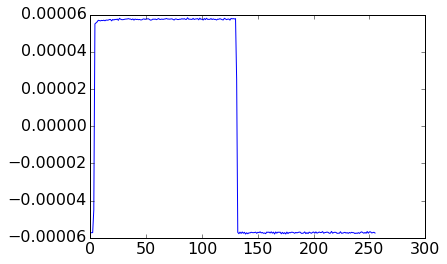

In [152]:
plot(fold.imag)

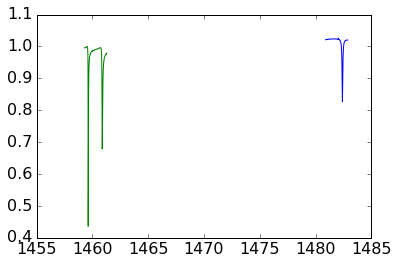

In [29]:
plot(snms[3].sweep_freqs_MHz,np.abs(snms[3].sweep_s21))
plot(snms[3+15].sweep_freqs_MHz,np.abs(snms[3+15].sweep_s21))

In [62]:
snm = snms[10]

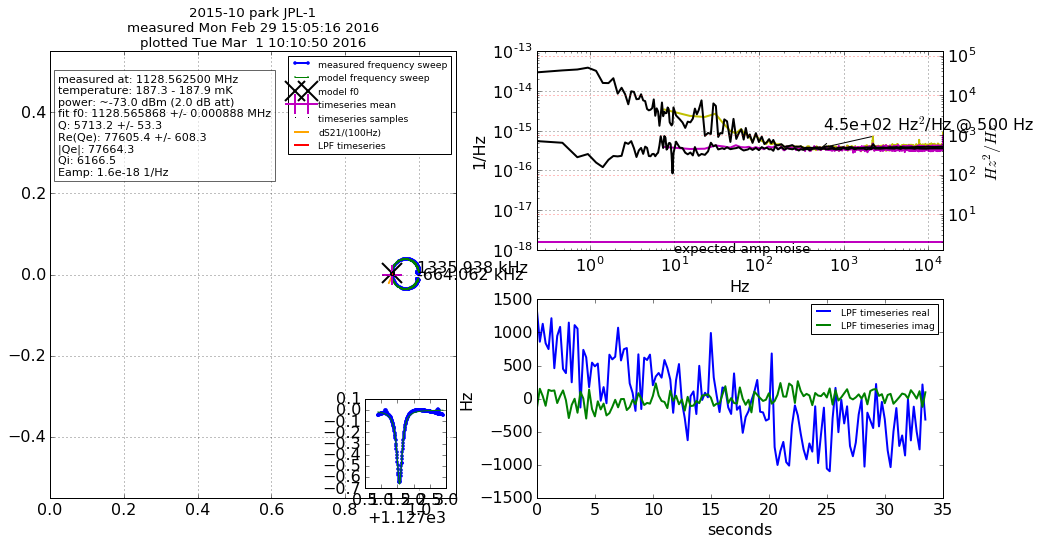

In [60]:
blah =snm.plot()

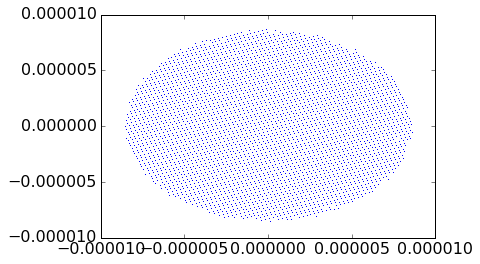

In [63]:
plot(snm.fractional_fluctuation_timeseries.real,snm.fractional_fluctuation_timeseries.imag,',')

In [64]:
import kid_readout.utils.filters

In [83]:
ff = kid_readout.utils.filters.low_pass_fir(snm.fractional_fluctuation_timeseries,cutoff=20./ snm.timeseries_sample_rate,decimate_by=256,num_taps=1024)

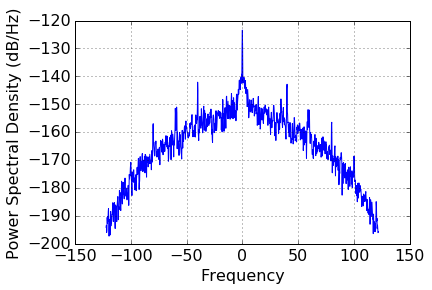

In [84]:
blah = psd(ff,NFFT=1024,Fs=snm.timeseries_sample_rate/128.)

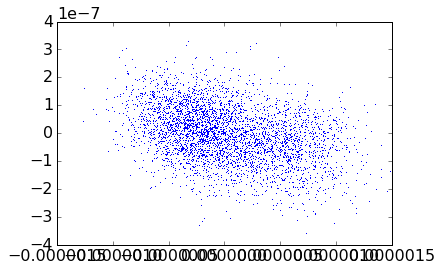

In [85]:
plot(ff.real,ff.imag,',')

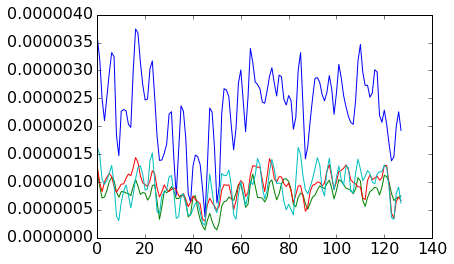

In [90]:
for snm in snms[:16:4]:
    ff = kid_readout.utils.filters.low_pass_fir(snm.fractional_fluctuation_timeseries,cutoff=20./ snm.timeseries_sample_rate,decimate_by=256,num_taps=1024)
    plot(ff.real[:128])
#plot(ff.imag)

In [61]:
[snm.zbd_voltage for snm in snms[16:]]

[0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999,
 0.026807899999999999]

In [91]:
ffs = np.vstack([np.fft.rfft(snm.fractional_fluctuation_timeseries.real) for snm in snms[:16]])

In [92]:
ffs.shape

(16, 524289)

(-0.1, 0.1)

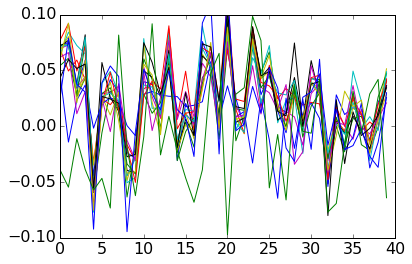

In [106]:
plot((ffs[:,60:100]).T.imag/ffs[:,1].T.imag)
ylim(-.1,.1)

In [129]:
U,S,V = np.linalg.svd(ffs.T[:ffs.shape[1]//8],full_matrices=False)

In [130]:
U.shape

(65536, 16)

In [119]:
S.shape

(16,)

In [120]:
V.shape

(16, 16)

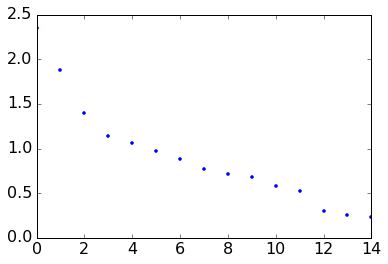

In [125]:
plot(S,'.')

In [131]:
recon = np.dot(np.dot(U[:,:1],np.diag(S[:1])),np.conj(V[:,:1]).T)

In [132]:
recon.shape

(65536, 16)

In [133]:
full_recon = np.zeros_like(ffs.T)
full_recon[:recon.shape[0],:] = recon
recon_tss = np.fft.irfft(full_recon,axis=0)

(1e-18, 1e-12)

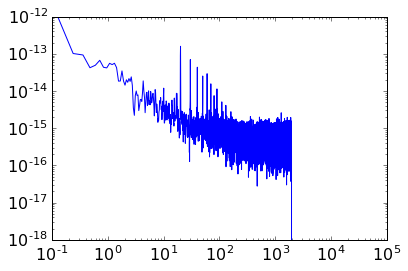

In [144]:

pxx,fr = mlab.psd(recon_tss[:,1],NFFT=2**18,Fs=snm.timeseries_sample_rate)
loglog(fr,pxx)
ylim(1e-18,1e-12)